### Introduction
This report was created to examine different algorithms and compare them to empirically prove how much implementation affects time complexity in coding. This report is dedicated to similarity algorithms, and before further explaining these calculations, I would like to define some concepts that will be used. 

A **similarity function** is used to measure the distance between two vectors, to see how similar two objects are. The main point of some of these experiments is to calculate the time complexity and key constants when using different scenarios. The **time complexity** refers to the theoretical time that the algorithm is supposed to take, and it’s represented in O notation. The **key constant** is a component that doesn’t depend on the size of the data input into an algorithm because it represents the fixed time of the execution. 

Firstly, several functions will be initialized, to make the processing of the data clearer, and later, several calculations will be presented, from various algorithms. 



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import time
import scipy.stats as stats
import multiprocessing
from multiprocessing import Pool
myfile='C://Users//Flor//Downloads//ADS//data2023.csv'
#myfile='C://Users//mc986//Downloads//data2023.csv'
#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=0)


In [4]:
#Commonly used functions in this report:


# Cosine similarity functions
def dot(v1, v2):
    total = 0
    for i in range(0, len(v1)):
        total += v1[i] * v2[i]
    return total

def cosine(v1, v2):
    return dot(v1, v2) / math.sqrt(dot(v1, v1) * dot(v2, v2))


def cosinenp(v1,v2):

    return np.dot(v1,v2)/math.sqrt(np.dot(v1,v1)*np.dot(v2,v2))

#Jaccard Similarity

def maketotal(alist):
    total = 0
    for item in alist:
        total += item
    return total

def jaccard(list1, list2):
    intersection = [min(val1, val2) for val1, val2 in zip(list1, list2)]
    resultado_intersection = maketotal(intersection)
    todo = maketotal(list1) + maketotal(list2) - resultado_intersection
    return resultado_intersection / todo

#Time function

def timeit(somefunc,*args,repeats=10,**kwargs):
    times=[]

    while repeats>0:
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
        repeats-=1

    mean=np.mean(times)
    stdev=np.std(times)

    return (mean,stdev)

#Transpose Matrix

def transpose(matrix):
    transposed = []
    for i in range(0, len(matrix[0])):
        transposed.append([row[i] for row in matrix])
    return transposed


#Plot Function:

def plot_function(x,y,titulo1,titulo2,titulo3):
    plt.scatter(x,y)
    plt.xlabel(titulo1)
    plt.ylabel(titulo2)
    plt.title(titulo3)
    return plt.show()

#log Function:

def log_function(x,y):
    logx=[np.log10(x) for x in x]
    logy=[np.log10(y) for y in y]
    return logx,logy

#Constant Function:
def constant_function(logx,logy):
    resultado = stats.linregress(logx, logy)
    constant=10**(resultado.intercept)
    return resultado,constant

#All-pair similarities:

def similitud_total(df, sim_function):
    pares = {}

    for col1 in df.columns:
        similitudes = {col2: sim_function(df[col1].values, df[col2].values) for col2 in df.columns if col1 != col2}
        pares[col1] = similitudes

    return pares


#Naive Multiplication function:
def naivemult(A,B):

    (m,n) = np.shape(A)

    C = np.zeros([m,m])

    for i in range(m):
        for j in range(m):
            for k in range(m):
                C[i,j] += A[i,k] * B[k,j]

    return C

#Strassen Multiplication method:
def segment(M):
    (mm,nn)=np.shape(M)
    n = int(mm/2)

    a=M[:n,:n]
    b=M[:n,n:]
    c=M[n:,:n]
    d=M[n:,n:]

    return (a,b,c,d)


def build(a,b,c,d):

    (mm,nn)=np.shape(a)
    C=np.zeros([2*mm,2*mm])

    C[:mm,:mm]=a
    C[:mm,mm:]=b
    C[mm:,:mm]=c
    C[mm:,mm:]=d

    return C


def strassen(M1, M2):

    if len(M1) <= 2:
        return naivemult(M1,M2)

    (a,b,c,d) = segment(M1)

    #note: e g f h NOT e f g h
    (e,g,f,h) = segment(M2)

    P1 = strassen(a, g-h)
    P2 = strassen(a+b, h)
    P3 = strassen(c+d,e)
    P4 = strassen(d,f-e)
    P5 = strassen(a+d,e+h)
    P6 = strassen(b-d,f+h)
    P7 = strassen(a-c,e+g)

    r = P5+P4-P2+P6
    s = P1+P2
    t = P3+P4
    u = P5-P3-P7+P1

    C = build(r,s,t,u)

    return C



### Cosine Similarity
The first type of similarity calculation that is going to be presented is Cosine Similarity. This can be defined as:
$(A, B) = \frac{A \cdot B}{\|A\| \|B\|}$ 
where A⋅B represents the dot product of vectors A and B; and ∥A∥ and ∥B∥ are the norms of those vectors.

The following code is going to show a test and a graphical representation of Cosine Similarity. Firstly, we compare two documents within our data. To be able to get a more accurate reading of the time complexity, I repeated the cosine similarity calculation for these two documents, with varying rows. 

In [ ]:
x_cosine=[]
y_cosine=[]
saltos=[100,200,400,600,800,1000,1500,2000,5000,7000,10000, 15000, 17000,20000]
for n in saltos:
    x_cosine.append(n)
    (mean,stdev)=timeit(cosine,df['doc7'][:n], df['doc16'][:n],repeats=100)
    y_cosine.append(mean)



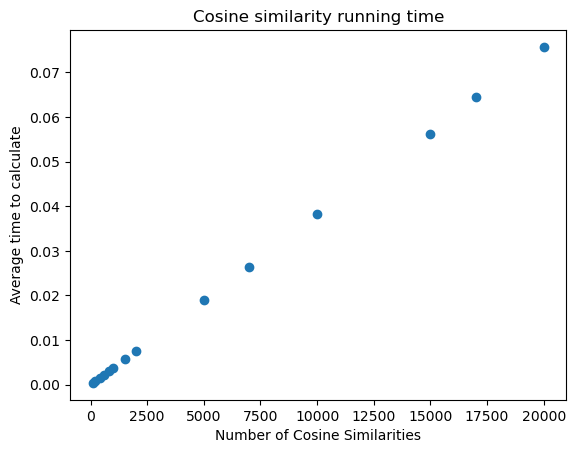

In [ ]:
plot_function(x_cosine,y_cosine,"Number of Cosine Similarities",
              "Average time to calculate",
              "Cosine similarity running time")

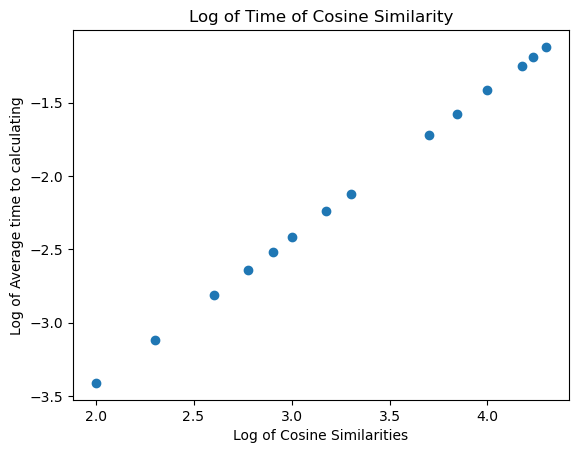

In [ ]:
(logx_cosine,logy_cosine)=log_function(x_cosine,y_cosine)
plot_function(logx_cosine,logy_cosine,"Log of Cosine Similarities",
              "Log of Average time to calculating",
              "Log of Time of Cosine Similarity")

In [ ]:
(resultado_cosine,primera_constante)=constant_function(logx_cosine,logy_cosine)
print("The slope for Cosine Similarity is",resultado_cosine.slope,"and the constant obtained is",primera_constante)

The slope for Cosine Similarity is 0.9958371264414604 and the constant obtained is 3.928164670772765e-06


The constant obtained is approximately **3.92 e-06** and the slope obtained is approximately **0.99**, which is consistent with the theoretical time complexity for this algorithm, which is **O(n)**. This theoretical time complexity is evident in the cosine function, where it is very clear that all calculations are linear, and loops aren’t being used. 
### Cosine Similarity using NumPy
As a second part of this experiment, cosine similarity was calculated using NumPy’s dot product, which has been proven to be faster. 

In [ ]:
x_cosineNP=[]
y_cosineNP=[]
for n in saltos:
    x_cosineNP.append(n)
    (mean,stdev)=timeit(cosinenp,df['doc7'][:n], df['doc16'][:n],repeats=100)
    y_cosineNP.append(mean)


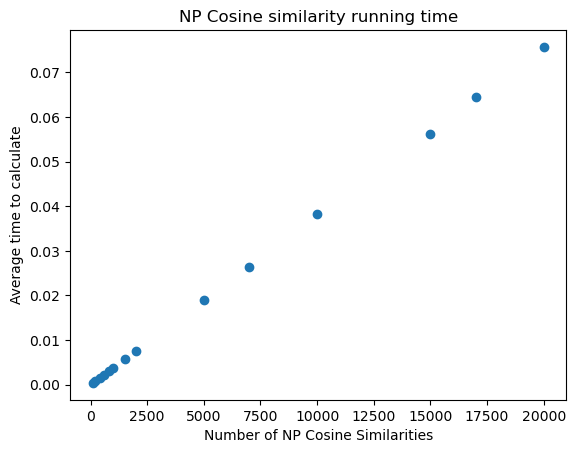

In [ ]:
plot_function(x_cosine,y_cosine,"Number of NP Cosine Similarities",
              "Average time to calculate",
              "NP Cosine similarity running time")

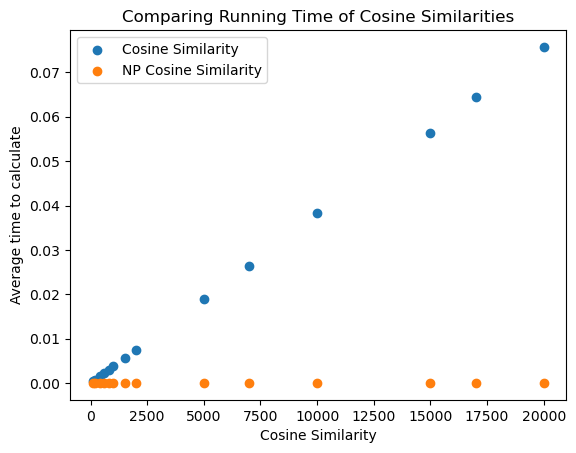

In [ ]:
%matplotlib inline
plt.scatter(x_cosine,y_cosine,label='Cosine Similarity')
plt.scatter(x_cosineNP,y_cosineNP,label='NP Cosine Similarity')
plt.xlabel("Cosine Similarity")
plt.ylabel("Average time to calculate")
plt.title("Comparing Running Time of Cosine Similarities")
plt.legend()
plt.show()

In [ ]:
(logx_cosineNP,logy_cosineNP)=log_function(x_cosineNP,y_cosineNP)

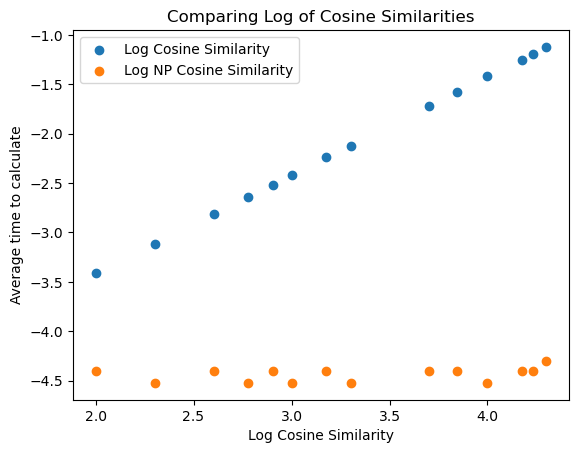

In [ ]:
%matplotlib inline
plt.scatter(logx_cosine,logy_cosine,label='Log Cosine Similarity')
plt.scatter(logx_cosineNP,logy_cosineNP,label='Log NP Cosine Similarity')
plt.xlabel("Log Cosine Similarity")
plt.ylabel("Average time to calculate")
plt.title("Comparing Log of Cosine Similarities")
plt.legend()
plt.show()

In [ ]:
(resultado_cosineNP,segunda_constante)=constant_function(logx_cosineNP,logy_cosineNP)
print("The slope for NP Cosine Similarity is",resultado_cosineNP.slope,"and the constant obtained is",segunda_constante)

The slope for NP Cosine Similarity is 0.03300199573606588 and the constant obtained is 2.8427863761907188e-05


After performing the same calculations with this modified Cosine Similarity function, I got a constant of approximately, **2.84 e-05**, with a slope of **0.033**. Even though the time complexity for this algorithm is still **O(n)**, since the sequence of calculations is the same as the first Cosine function, the use of the NumPy library has optimized its performance, making it significantly faster. 
### Jaccard
The second similarity algorithm that we will use in this report is Jaccard Similarity, which can be defined as: 
$J(A, B) = \frac{|A \cap B|}{|A \cup B|}$ where $|A \cap B|$ is the size of the intersection of the sets; and $|A \cup B|$ is the size of their union.


For the next part of this report, this code is going to present repeated calculations of Jaccard similarity with varying rows. Due to a request, the structure of the data was not modified, so this algorithm utilises lists instead of dictionaries, which is the best way to implement this similarity.  

In [ ]:
x_jaccard=[]
y_jaccard=[]

for n in saltos:
    x_jaccard.append(n)
    (mean,stdev)=timeit(jaccard,df['doc7'][:n], df['doc16'][:n],repeats=100)
    y_jaccard.append(mean)

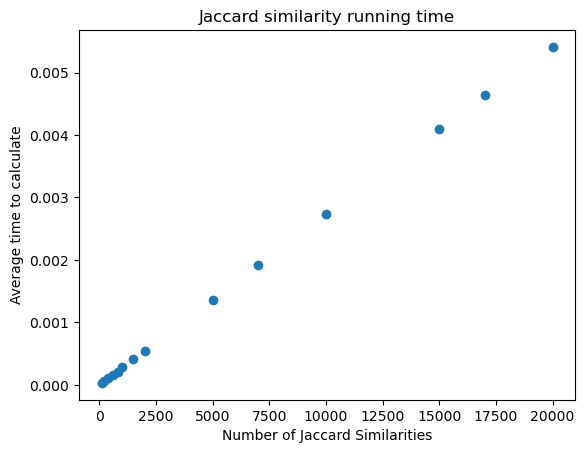

In [ ]:
plot_function(x_jaccard,y_jaccard,"Number of Jaccard Similarities",
              "Average time to calculate",
              "Jaccard similarity running time")

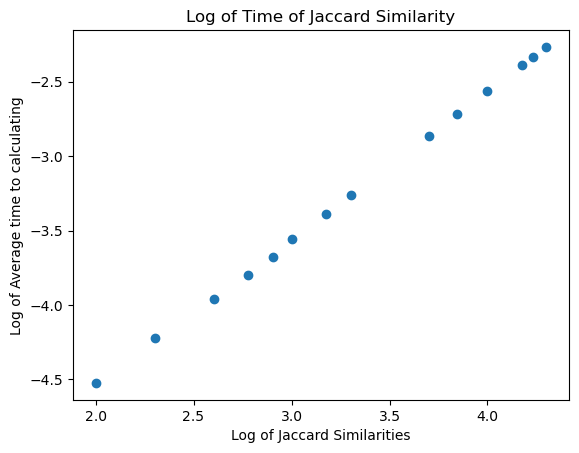

In [ ]:
(logx_jaccard,logy_jaccard)=log_function(x_jaccard,y_jaccard)
plot_function(logx_jaccard,logy_jaccard,"Log of Jaccard Similarities",
              "Log of Average time to calculating",
              "Log of Time of Jaccard Similarity")

In [ ]:
(resultado_jaccard,tercera_constante)=constant_function(logx_jaccard,logy_jaccard)
print("The slope for Jaccard Similarity is",resultado_jaccard.slope,"and the constant obtained is",tercera_constante)

The slope for Jaccard Similarity is 0.9883659645233234 and the constant obtained is 3.0124737102818827e-07


The theoretical time complexity for the Jaccard similarity implemented in this report is **O(n)**. The constant obtained is approximately **3.01e-07**, and the slope calculated is **0.98**, which follows the time complexity. This can be explained by the calculation being done through list comprehension, in a linear pass, and not by using nested loops.
### All-pair Similarities
Up until now, we have only been measuring similarities between one pair of documents at a time, with varying lengths. The following code is going to be using a function called “similitud_total” which calculates the similarity of all pairs in the data, with a given similarity function. 


In [ ]:
totalx_cosine = []
totaly_cosine = []
repeticiones = 4
extended_df = pd.concat([df] * repeticiones, axis=1)
extended_df.columns = [f"{col}{i}" for i, col in enumerate(extended_df.columns)]

for n in range(1, len(extended_df.columns)):
    mean, stdev = timeit(similitud_total, extended_df.iloc[:n*50,0:n], cosine,repeats=10)
    totalx_cosine.append(n)
    totaly_cosine.append(mean+0.0000001)

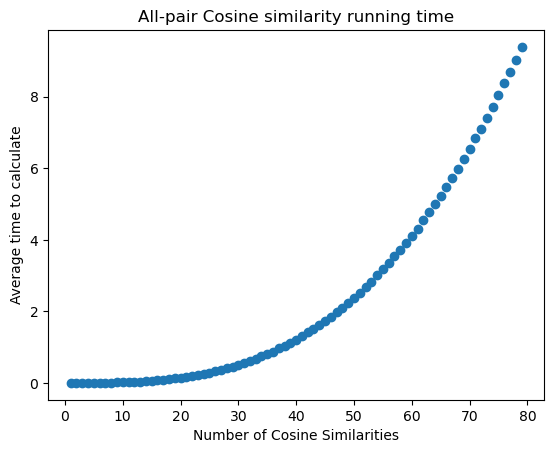

In [ ]:
plot_function(totalx_cosine,totaly_cosine,"Number of Cosine Similarities",
              "Average time to calculate",
              "All-pair Cosine similarity running time")


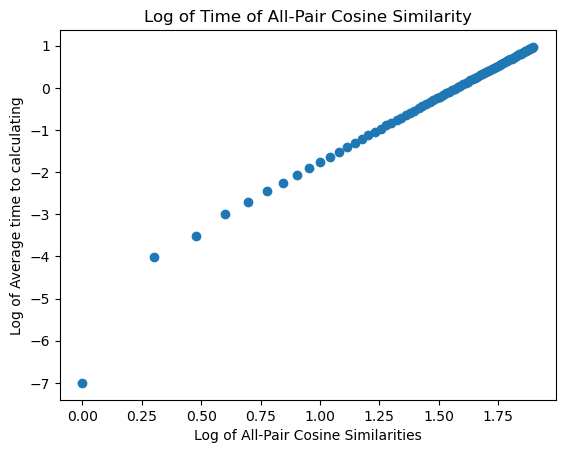

In [ ]:
(totallogx_cosine,totallogy_cosine)=log_function(totalx_cosine,totaly_cosine)
plot_function(totallogx_cosine,totallogy_cosine,"Log of All-Pair Cosine Similarities",
              "Log of Average time to calculating",
              "Log of Time of All-Pair Cosine Similarity")

In [ ]:
(resultado_cosine_total,cuarta_constante)=constant_function(totallogx_cosine,totallogy_cosine)
print("The slope for all-pair Cosine Similarity is",resultado_cosine_total.slope,"and the constant obtained is",cuarta_constante)

The slope for all-pair Cosine Similarity is 3.3394312039695118 and the constant obtained is 5.411930242940725e-06


In [ ]:
totalx_jaccard = []
totaly_jaccard = []

for n in range(1, len(extended_df.columns)):
    mean, stdev = timeit(similitud_total, extended_df.iloc[:n*50,0:n], jaccard,repeats=10)
    totalx_jaccard.append(n)
    totaly_jaccard.append(mean+0.0000001)

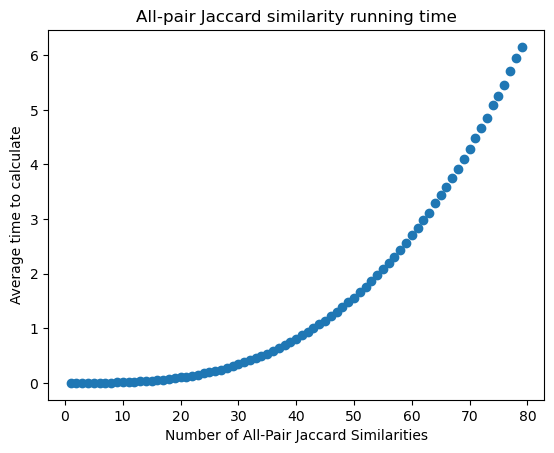

In [ ]:
plot_function(totalx_jaccard,totaly_jaccard,"Number of All-Pair Jaccard Similarities",
              "Average time to calculate",
              "All-pair Jaccard similarity running time")

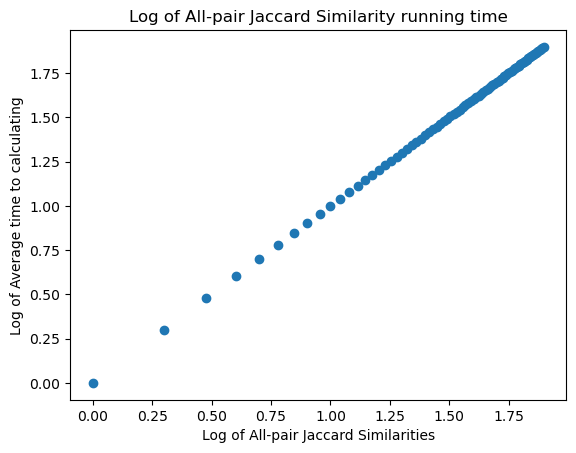

In [ ]:
(totallogx_jaccard,totallogy_jaccard)=log_function(totalx_jaccard,totaly_jaccard)
plot_function(totallogx_jaccard,totallogx_jaccard,"Log of All-pair Jaccard Similarities",
              "Log of Average time to calculating",
              "Log of All-pair Jaccard Similarity running time")

In [ ]:
(resultado_jaccard_total,quinta_constante)=constant_function(totallogx_jaccard,totallogy_jaccard)
print("The slope for All-Pair Jaccard Similarity is",resultado_jaccard_total.slope,"and the constant obtained is",quinta_constante)

The slope for All-Pair Jaccard Similarity is 3.2308559804863655 and the constant obtained is 5.395880139036943e-06


The theoretical time complexity is $O(n^2 x m)$, this is caused by the for loops required to compute all the pairs of vectors, plus the added complexity of m, which is tied to the length of the vectors. This is true regardless of the similarity function that is being used.

These similarities were calculated using both functions, and the results obtained were: 

    -With Cosine Similarity: the slope is approximately 3.33 and the constant is 5.41e-06. 
    -With Jaccard Similarity: the slope is approximately 3.23 and the constant is 5.39e-06

The difference between the empirical results and the theoretical ones can be explained by the length of the data given to this function, which was a multiplication of the original data, and by the use of DataFrames to perform the calculations. 

### Parallel Computing
As a next step in this report, we are going to analyse the cosine similarity function using parallel computing. The idea behind parallel computing is distributing the calculations that are necessary for a certain process in the different cores modern computers have, to improve the total running time. 

For multiprocessing computing to work properly, the function being called by the parallel computing function Pool, must not be in this same file. That is the reason why I imported a file called ‘Adjunto’ which has a cosine similarity function defined in it. 



In [6]:
import Adjunto
matrix=df.values
transposed_matrix=transpose(matrix)

#The file called Adjunto has the following code:
#
#import math
#import pandas as pd
#
#def dot(v1,v2):
#    total=0
#    for i in range(0,len(v1)):
#        total+=v1[i]*v2[i]
#    return total
#
#
#def cosine(vectores):
#    v1,v2=vectores
#    return dot(v1,v2)/math.sqrt(dot(v1,v1)*dot(v2,v2))


To check the performance of my computer, I have created a function, called “core_investigation”, which takes a number of repeats, a number of processes and a number of loops, as arguments. The idea of this function is to iterate over the same cosine similarity calculation several times and divide these calculations into a varying number of cores (the processes).

When running the parallel computation, I created a for loop that goes over every pair of vectors and adds them into a list, which is then used in the “core_investigation” function, to iterate when calculating the similarities. 

In [ ]:
pares = []
for element in range(len(transposed_matrix)):
    for item in range(len(transposed_matrix)):
        pares.append((transposed_matrix[element], transposed_matrix[item]))

In [ ]:
def core_investigation(num_repeats, num_processes, num_loops):
    a = math.floor(num_repeats / num_processes)

    for i in range(a):
        inputs = [num_loops] * num_processes
        pool_of_processes = Pool(processes=num_processes)
        xs = pool_of_processes.map(Adjunto.cosine, pares)
        pool_of_processes.close()

    inputs = [num_loops] * (num_repeats - a * num_processes)
    pool_of_processes = Pool(processes=num_processes)
    xs = pool_of_processes.map(Adjunto.cosine, pares)
    pool_of_processes.close()

Given that the computer where I’m running this code has 16 cores, I have doubled that number to get a more accurate reading of the multiprocessing capabilities of this matching. This is a common practice, given that modern cores have hyper-threading, which splits each physical core into two logical ones. 

In [ ]:
times = []
for p in range(1, 33):
    starttime = time.time()

    core_investigation(20, p, 10)

    endtime = time.time()
    timetaken = endtime - starttime

    times.append(timetaken)
    print(p)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


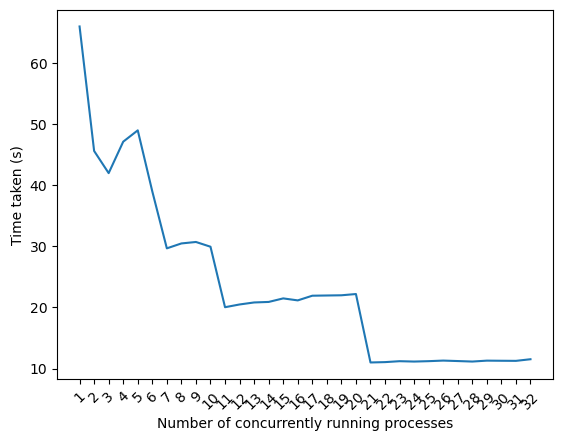

In [ ]:
processes = list(range(1, 33))
plt.plot(processes, times)
plt.xlabel("Number of concurrently running processes")
plt.ylabel("Time taken (s)")
plt.xticks(processes, rotation=45)
plt.show()

This graph shows the time taken to calculate the cosine similarity for all pairs of vectors, using different amounts of cores. As expected, the time it takes one core to perform these calculations is much higher than the time it takes multiple cores to do them simultaneously.

The result of this experiment shows that for this computer, and with these calculations, the optimal number of cores to use is 21. This is evident by the lowest point in the graph being at this core, and by the apparent stable time, with a minimal rise, presented when more cores are implemented.  

### Cosine Similarity using Strassen's Method of multiplication

We have already calculated similarities, using both Cosine and Jaccard, for two pairs of documents, for all pairs of documents, and for all pairs of documents using parallel computing. As a final experiment in this report, we are going to be improving the cosine similarity algorithm by utilizing the Strassen method of matrix multiplication. 

To make this clearer, it is important to remember how Cosine Similarity and the Strassen Method are defined:


- **Cosine Similarity:**
$$
(A, B) = \frac{A \cdot B}{\|A\| \|B\|}
$$ 
where A⋅B represents the dot product of vectors A and B; and ∥A∥ and ∥B∥ are the norms of those vectors.


- **Strassen Method:** this is an effective method of large matrix multiplication, which derives its efficiency from splitting these large matrices into smaller ones, hence lowering the complexity of the operations. To apply this method, the matrices need to be square, meaning they must have the same number of rows and columns, and that number must be a power of 2.

Strassen can be used to improve the efficiency of Cosine Similarities when it is used to multiply a given matrix by its transposed matrix, instead of using the dot product. Secondly, the norm of each vector is calculated by extracting the diagonal of the matrix product and computing the square root. After obtaining the norms and the dot product, with Strassen, the cosine similarity equation can be calculated.

Because of Strassen’s limitations when it comes to square matrixes, and to prove its efficiency in larger sets of data, I have extended the original data frame and generated larger square matrixes to be used with this function. 


In [ ]:
repeticiones5 = 55
extended_square_df = pd.concat([df] * repeticiones5, axis=1)
extended_square_matrix=extended_square_df.values


square_index=[]
n=11
for i in range(1,n):
    square_index.append(2**i)

In [ ]:
def strassen_cosine(matrix):
    vectores = len(matrix)
    matrix_array = np.array(matrix)
    multiplicacion = strassen(matrix_array, matrix_array.T)
    norms = np.sqrt(np.diag(multiplicacion))
    similitudes = multiplicacion / (np.outer(norms, norms))
    np.fill_diagonal(similitudes, 0)

    return similitudes.tolist()

To prove that the use of the Strassen method does improve the run time for the cosine similarity algorithm, I have calculated the cosine similarities of all pairs of vectors, for the same matrixes, using both Cosine improved with Strassen, and without.  

In [ ]:
x_strassen = []
y_strassen = []

for item in square_index:
    strassen_matrix = extended_square_df.iloc[0:item, 0:item]
    x_strassen.append(item)
    (mean,stdev)=timeit(strassen_cosine,strassen_matrix,repeats=10)
    y_strassen.append(mean)

C:\Users\mc986\AppData\Local\Temp\ipykernel_6216\4002343129.py:6: RuntimeWarning: invalid value encountered in divide
  similitudes = multiplicacion / (np.outer(norms, norms))


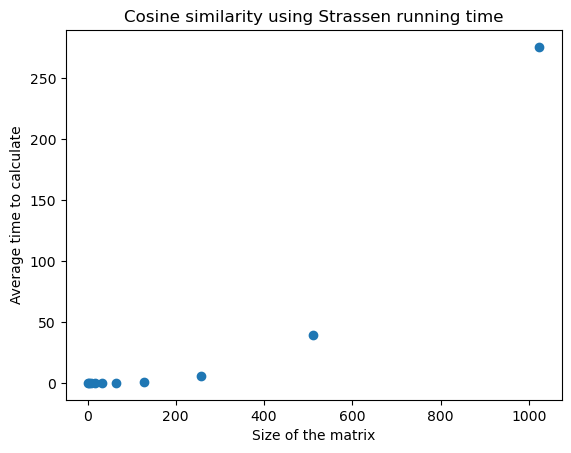

In [ ]:
plot_function(x_strassen,y_strassen,"Size of the matrix",
              "Average time to calculate",
              "Cosine similarity using Strassen running time")

In [ ]:
x_cosine_5 = []
y_cosine_5 = []

for item in square_index:
    matrix = extended_square_df.iloc[0:item, 0:item].values
    x_cosine_5.append(item)
    (mean,stdev) = timeit(similitud_total, pd.DataFrame(matrix), cosine,repeats=10)
    y_cosine_5.append(mean)


C:\Users\mc986\AppData\Local\Temp\ipykernel_6216\4118902340.py:12: RuntimeWarning: invalid value encountered in divide
  return dot(v1, v2) / math.sqrt(dot(v1, v1) * dot(v2, v2))


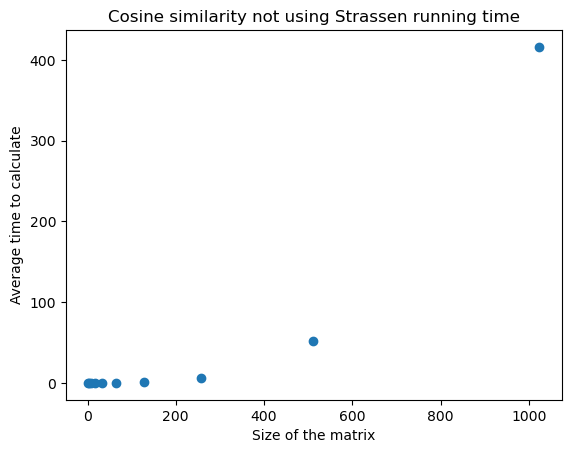

In [ ]:
plot_function(x_cosine_5,y_cosine_5,"Size of the matrix",
              "Average time to calculate",
              "Cosine similarity not using Strassen running time")

The first graph showed the time it took for the cosine with Strassen to multiply all the possible pairs of vectors in the square matrixes given, while the second one showed the time it took for the traditional cosine method to do the same. 

As seen by the scale of the time that was used, it is clear that the use of the Strassen method of multiplication significantly improves the run time: the larger matrix computed took an average of approximately 250 seconds with Strassen multiplication, while the same matrix took an average of approximately 400 seconds without it. 


### Conclusion
This report has shown different algorithms dedicated to similarity calculations, under different circumstances. Jaccard and Cosine similarities were tested against different lengths of documents, and different amounts of documents, to see which one was more effective.

Additionally, multiprocessing computing was included in the report, demonstrating yet another implementation of the same algorithms. As a final observation, the Cosine Similarity was improved via the use of the Strassen Method of matrix multiplication. 

After conducting all these calculations, it has been proven that Cosine similarity is more effective than Jaccard similarity when it comes to calculating the similarity of large amounts of data. As an improvement to this similarity algorithm, the use of the NumPy library, parallel computing and the Strassen method of multiplication can be used. These changes have a significant impact on the running time of these processes, making large computations faster by taking advantage of optimized libraries, mathematical knowledge, and multiprocessing methods.  

